In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("mnist_data.csv")

In [121]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df.shape

(60000, 785)

In [123]:
df.sample()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
19066,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


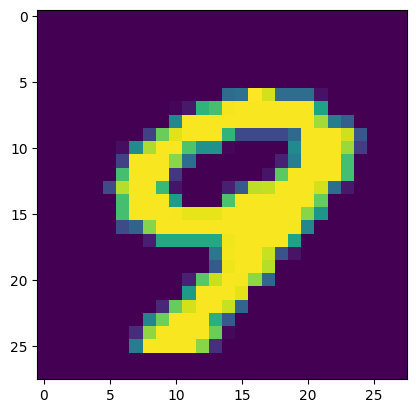

In [124]:
plt.imshow(df.iloc[7647, 1:].values.reshape(28,28))

In [125]:
df.sample()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
18643,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


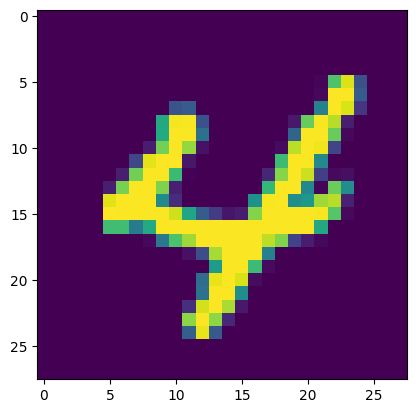

In [126]:
plt.imshow(df.iloc[847, 1:].values.reshape(28,28))

In [127]:
X = df.iloc[:,1:]
Y = df.iloc[:, 0]

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [129]:
X_train.shape

(42000, 784)

In [188]:
X_test.shape

(18000, 784)

In [130]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [131]:
y_pred = knn.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, y_pred)
acc

0.9694444444444444

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [183]:
from sklearn.decomposition import PCA

pca = PCA(n_components =225)

X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [184]:
X_train_trf.shape

(42000, 225)

In [185]:
knn.fit(X_train_trf, Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [186]:
y_pred_pca = knn.predict(X_test_trf) 

In [187]:
acc_pca = accuracy_score(Y_test, y_pred_pca)
acc_pca

0.9505555555555556

In [ ]:
# Eigen Values 
pca.explained_variance_

array([40.55944304, 29.30453794, 26.86770127, 20.65391367, 18.02713657,
       15.77362506, 13.8979512 , 12.47469717, 10.99539957, 10.00750105,
        9.64023748,  8.72339305,  7.99328005,  7.84987663,  7.39447384,
        7.14472031,  6.77358464,  6.6335189 ,  6.4026975 ,  6.22096903,
        5.93975424,  5.77342824,  5.53336208,  5.3222284 ,  5.1405725 ,
        5.03269565,  4.89477827,  4.75770968,  4.53319279,  4.40752453,
        4.31165744,  4.2144734 ,  4.10345526,  4.03955112,  3.99978436,
        3.86897165,  3.83037932,  3.75536155,  3.67459189,  3.4686124 ,
        3.41589329,  3.39066335,  3.32996715,  3.29085501,  3.27197403,
        3.22693139,  3.1378582 ,  3.12328148,  3.06871198,  3.03069304,
        2.95169142,  2.88717159,  2.88543709,  2.86494598,  2.80593126,
        2.75168344,  2.71407685,  2.69626809,  2.64662796,  2.59630645,
        2.53072677,  2.51247169,  2.48667299,  2.47899814,  2.45609448,
        2.42731261,  2.38336327,  2.33134979,  2.31975796,  2.28

In [192]:
pca.explained_variance_.shape

(225,)

In [194]:
# Eigen Vector
pca.components_

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(225, 784))

In [195]:
pca.explained_variance_ratio_

array([0.05696415, 0.04115708, 0.03773464, 0.02900762, 0.02531841,
       0.02215344, 0.01951913, 0.01752022, 0.01544261, 0.01405514,
       0.01353934, 0.01225166, 0.01122625, 0.01102485, 0.01038525,
       0.01003448, 0.00951324, 0.00931652, 0.00899234, 0.00873711,
       0.00834215, 0.00810855, 0.00777139, 0.00747486, 0.00721973,
       0.00706822, 0.00687452, 0.00668202, 0.00636669, 0.0061902 ,
       0.00605555, 0.00591906, 0.00576314, 0.00567339, 0.00561754,
       0.00543382, 0.00537962, 0.00527426, 0.00516082, 0.00487153,
       0.00479749, 0.00476205, 0.00467681, 0.00462188, 0.00459536,
       0.0045321 , 0.004407  , 0.00438653, 0.00430989, 0.00425649,
       0.00414554, 0.00405492, 0.00405248, 0.0040237 , 0.00394082,
       0.00386463, 0.00381181, 0.0037868 , 0.00371709, 0.00364641,
       0.00355431, 0.00352867, 0.00349244, 0.00348166, 0.00344949,
       0.00340907, 0.00334734, 0.00327429, 0.00325801, 0.00320266,
       0.00318262, 0.00315546, 0.00311911, 0.00309449, 0.00304

In [196]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.05696415 0.09812123 0.13585587 0.16486348 0.19018189 0.21233533
 0.23185446 0.24937469 0.2648173  0.27887244 0.29241178 0.30466344
 0.31588969 0.32691454 0.33729979 0.34733427 0.3568475  0.36616402
 0.37515636 0.38389347 0.39223562 0.40034418 0.40811557 0.41559043
 0.42281016 0.42987839 0.43675291 0.44343493 0.44980162 0.45599182
 0.46204737 0.46796644 0.47372958 0.47940297 0.48502051 0.49045433
 0.49583395 0.50110821 0.50626903 0.51114056 0.51593805 0.5207001
 0.52537691 0.52999879 0.53459415 0.53912625 0.54353325 0.54791977
 0.55222966 0.55648615 0.56063168 0.5646866  0.56873909 0.57276279
 0.57670361 0.58056824 0.58438006 0.58816686 0.59188395 0.59553036
 0.59908467 0.60261333 0.60610577 0.60958743 0.61303691 0.61644598
 0.61979332 0.62306761 0.62632562 0.62952828 0.63271091 0.63586636
 0.63898548 0.64207996 0.64512981 0.64817388 0.6511687  0.65411196
 0.65701276 0.6599027  0.66277282 0.66562531 0.66846007 0.67127632
 0.67408496 0.6768767  0.67966601 0.68239655 0.68510886 0.68780

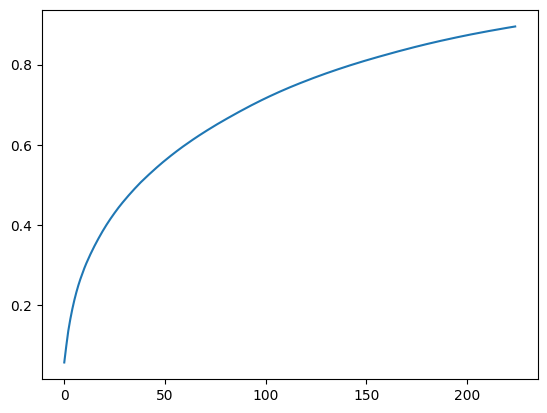

In [202]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [139]:
for i in range(1,10):
    pca = PCA(n_components= i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, Y_train)

    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_pred, Y_test))

0.26811111111111113
0.41394444444444445
0.4826666666666667
0.6211666666666666
0.7358333333333333
0.8239444444444445
0.8698333333333333
0.9005555555555556
0.9145
